<a href="https://colab.research.google.com/github/JamesGilJGBS/Portifolio/blob/main/SEO/GoogleTrends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SimpreNina

SEO(Search Engine Optimization) para loja virtual de laços, tiaras, e turbantes siemprenina.com.br

Análise do Google Trends de palavras chaves e ocorrências geográficas.

## Bibliotecas:

In [1]:
#!pip install pytrends
#!pip install pyodbc
#!pip install plotly

In [2]:
import pandas as pd
import numpy as np
import datetime
from datetime import timezone, datetime, timedelta, date
import seaborn as sns
sns.set()

import plotly
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly.offline as pyo
init_notebook_mode(connected=True)

import matplotlib.pyplot as plt

import requests
import pyodbc
import hashlib
from pytrends.request import TrendReq
pytrends = TrendReq(hl='pt-BR', tz=360)

import json

## Tendências do dia no Brasil.

In [3]:
# Get Google Hot Trends data
print('Tendências do Dia: Hot Trends')
today_searches_df = pytrends.today_searches(pn='BR')
print(today_searches_df)

Tendências do Dia: Hot Trends
0                    Gossip Girl
1                 Forças Armadas
2              Vacina Vila Velha
3                       Umuarama
4                Elize Matsunaga
5             Randolfe Rodrigues
6            Francieli Fantinato
7     Agendamento vacina vitoria
8                      Megan Fox
9                        Matilda
10     Concurso policia Civil MG
11         Prefeitura de vitoria
12                   Mara Wilson
13                   Bruno Viana
14                    Bossa Nova
15             Olavo de Carvalho
Name: query, dtype: object


## Busca Palavras Chaves.

In [4]:
# Kw
termo = 'laço'
pytrends.build_payload(kw_list=[termo], timeframe='2020-01-01 2021-07-30', geo='BR') 
df_rq = pytrends.related_queries()
print('Assuntos Pesquisados de', termo)

# display df_rq
print(df_rq)

Assuntos Pesquisados de laço
{'laço': {'top':                             query  value
0                      fazer laço    100
1                 como fazer laço     89
2                    laço de fita     78
3                  menina de laço     33
4                    laço de amor     32
5                  laço de cabelo     30
6                       laço rosa     28
7                 um laço de amor     28
8          menina do laço de fita     25
9                           laços     25
10             fazer laço de fita     24
11        como fazer laço de fita     22
12  menina bonita do laço de fita     22
13                           laco     21
14                 fita para laço     20
15                  laço infantil     19
16                     molde laço     19
17                  laço de cetim     18
18                       laço png     15
19                  laço boutique     14
20                  prova do laço     13
21             como fazer um laço     13
22         

## Gráfico de busca de "laço" por estado.

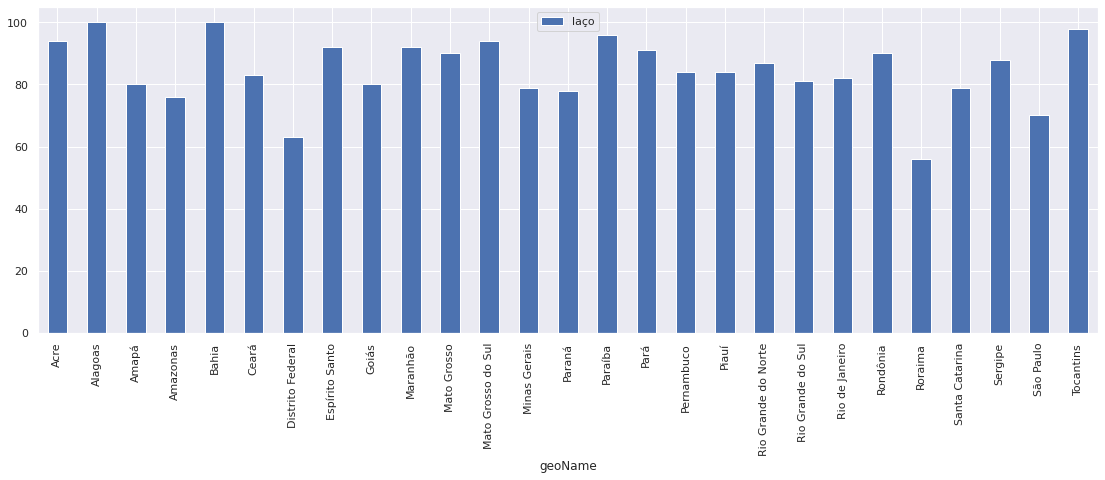

In [5]:
df = pytrends.interest_by_region()
df.head(27)
df.reset_index().plot(x = 'geoName', y = termo, figsize = (19, 6), kind = 'bar')

## Gráfico de busca de "laço" por período.

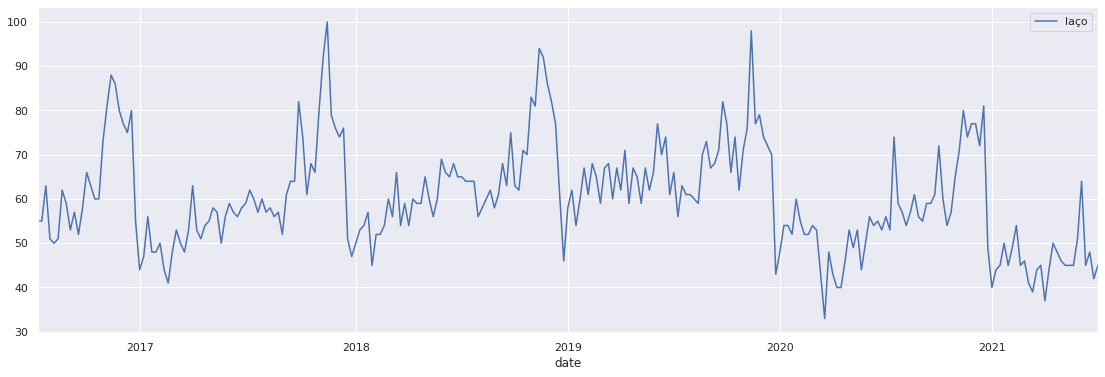

In [6]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() &amp; related_queries()
pytrends.build_payload(kw_list=[termo])
 
# Interest Over Time
interest_over_time_df = pytrends.interest_over_time()
interest_over_time_df[interest_over_time_df.index>=datetime(2016,1,1)]\
.pivot_table(values=[termo], index='date')\
.plot(kind='line', stacked=True, figsize=(19,6))

## Gráfico de busca de "tiara" por período.

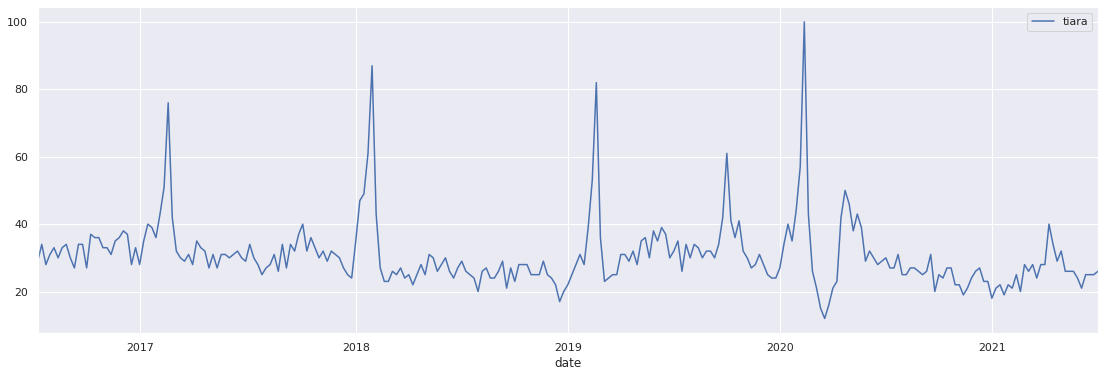

In [7]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() &amp; related_queries()
pytrends.build_payload(kw_list=['tiara'])
 
# Interest Over Time
interest_over_time_df = pytrends.interest_over_time()
interest_over_time_df[interest_over_time_df.index>=datetime(2016,1,1)]\
.pivot_table(values=['tiara'], index='date')\
.plot(kind='line', stacked=True, figsize=(19,6))

## Gráfico de busca de "turbante" por período.

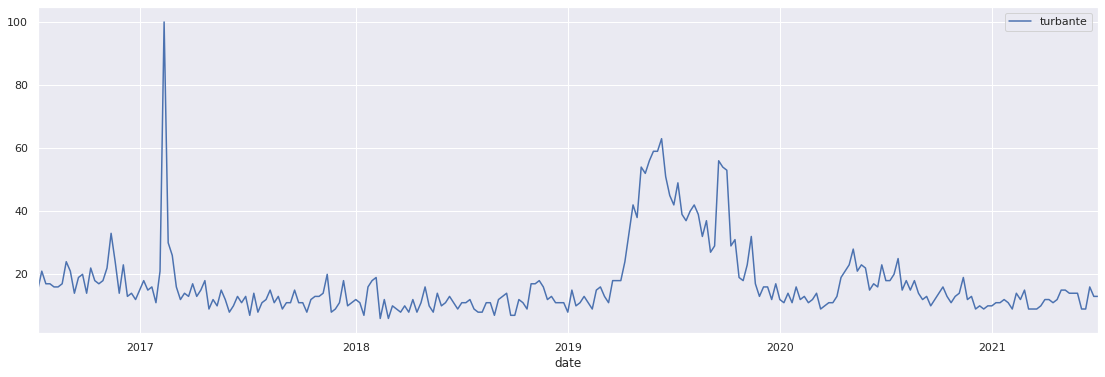

In [8]:
# Create payload and capture API tokens. Only needed for interest_over_time(), interest_by_region() &amp; related_queries()
pytrends.build_payload(kw_list=['turbante'])
 
# Interest Over Time
interest_over_time_df = pytrends.interest_over_time()
interest_over_time_df[interest_over_time_df.index>=datetime(2016,1,1)]\
.pivot_table(values=['turbante'], index='date')\
.plot(kind='line', stacked=True, figsize=(19,6))

## Comparativo entre os itens

In [9]:
kw_list = ['laço', 'tiara', 'turbante']
kw_group = list(zip(*[iter(kw_list)]*1))
print(kw_group)

[('laço',), ('tiara',), ('turbante',)]


In [10]:
kw_grplist = [list(x) for x in kw_group]
print(kw_grplist)

[['laço'], ['tiara'], ['turbante']]


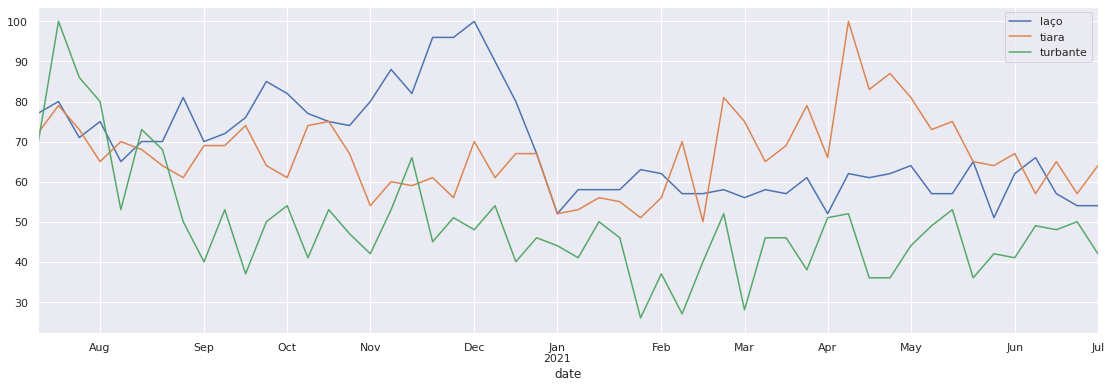

In [11]:
trendshow = TrendReq(hl='pt-BR', tz=360)
dict = {}
i = 0
for kw in kw_grplist:
    trendshow.build_payload(kw, timeframe = 'today 12-m', geo='BR')
    dict[i] = trendshow.interest_over_time()
    i += 1

trendframe = pd.concat(dict, axis=1)
trendframe.columns = trendframe.columns.droplevel(0)
trendframe = trendframe.drop('isPartial', axis = 1)
trendframe.plot(kind='line', stacked=False, figsize=(19,6))